In [3]:
%matplotlib inline
%config Completer.use_jedi = False

import datetime
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib


import openai
openai.api_key_path = "/Users/sergmiller/.openai2"
import dsp
import dspy
import tqdm

In [14]:
DIR = "sp500_data/"

tickers = {}
for t in tqdm.tqdm(os.listdir(DIR), position=0):
    if not t[-4:] == ".csv":
        continue
    tickers[t[:-4]] = pd.read_csv(DIR + t)[["Date", "Close"]]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 486/486 [00:02<00:00, 169.43it/s]


In [29]:
tickers["AAPL"][tickers["AAPL"]["Date"] >= "2008-12-01"].index[0]

231

In [30]:
def load_prices_info_up_to_date(last_date, history_len_days=7):
    prices = {}
    for i in range(history_len_days):
        for t in tickers.keys():
            seq = tickers[t]
            pos = seq[seq["Date"] >= last_date].index[0]
            prices[t] = tickers[t][pos - history_len_days + 1:pos + 1]
    return prices

In [96]:
DATE = "2014-02-30"

In [102]:
p = load_prices_info_up_to_date(DATE, 30)

In [103]:
p["AAPL"]

,Date,Close
1522,2014-01-17,19.309643
1523,2014-01-21,19.609644
1524,2014-01-22,19.696787
1525,2014-01-23,19.863571
1526,2014-01-24,19.502501
1527,2014-01-27,19.660713
1528,2014-01-28,18.089287
1529,2014-01-29,17.883928
1530,2014-01-30,17.849285
1531,2014-01-31,17.878571


In [104]:
def make_sentence(ticker, history):
    seq = "This is close prices for ticker " + ticker + " for last " + str(len(history))  +" days:\n"
    for l in history.values:
        date,vol = l
        seq += date + ":" + str(round(vol, 3)) + "\n"
    return seq

In [105]:
print(make_sentence("AAPL", p["AAPL"]))

This is close prices for ticker AAPL for last 30 days:
2014-01-17:19.31
2014-01-21:19.61
2014-01-22:19.697
2014-01-23:19.864
2014-01-24:19.503
2014-01-27:19.661
2014-01-28:18.089
2014-01-29:17.884
2014-01-30:17.849
2014-01-31:17.879
2014-02-03:17.912
2014-02-04:18.171
2014-02-05:18.307
2014-02-06:18.304
2014-02-07:18.56
2014-02-10:18.892
2014-02-11:19.141
2014-02-12:19.14
2014-02-13:19.444
2014-02-14:19.428
2014-02-18:19.5
2014-02-19:19.192
2014-02-20:18.97
2014-02-21:18.759
2014-02-24:18.841
2014-02-25:18.645
2014-02-26:18.477
2014-02-27:18.845
2014-02-28:18.794
2014-03-03:18.849



In [106]:
def plot_price(ticker, history):
    k,v = history["Date"].values, history["Close"].values
    numeric_dates = matplotlib.dates.date2num(k)

    # Plot the curve
    plt.figure(figsize=(30,5))
    plt.title(ticker)
    plt.plot_date(numeric_dates, v, '-')
    plt.grid(True)

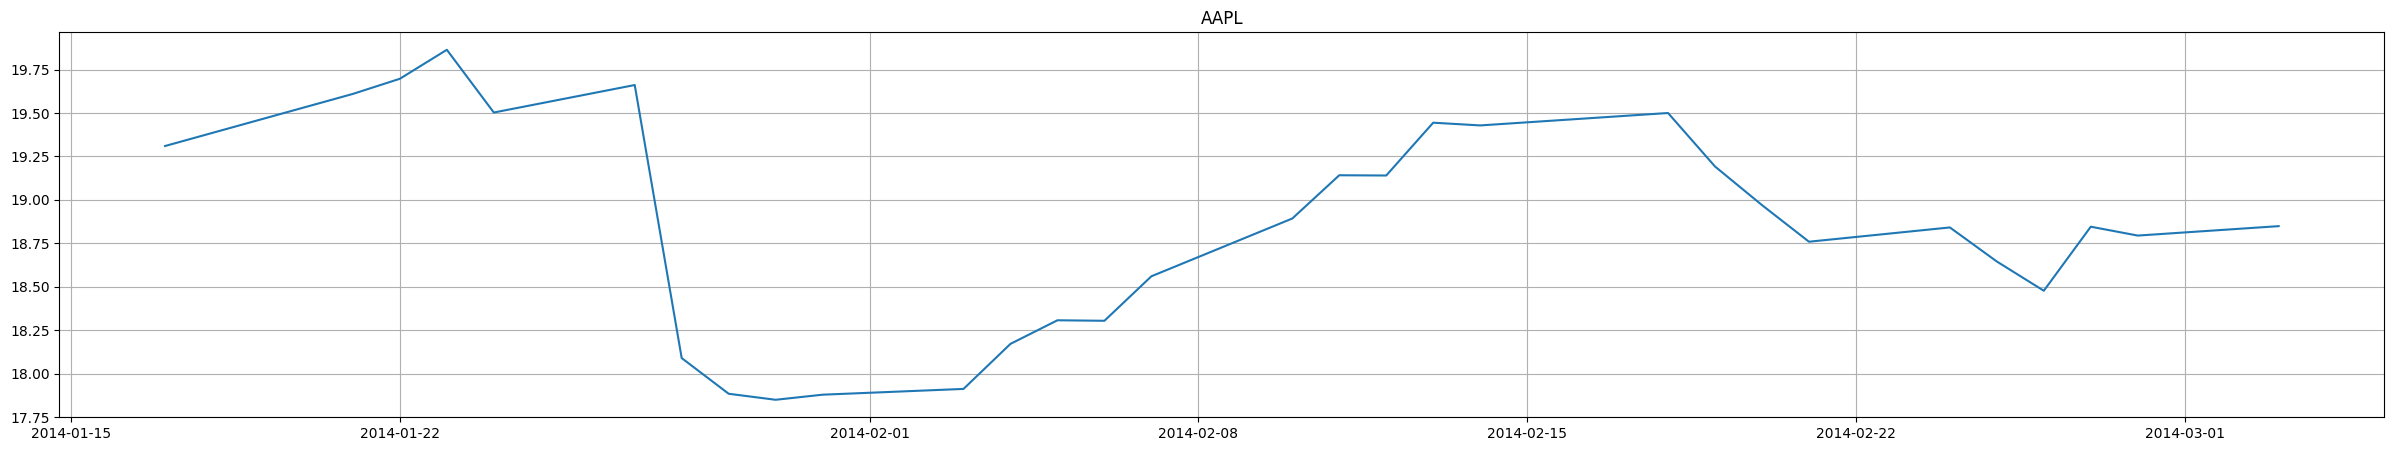

In [107]:
plot_price("AAPL", p["AAPL"])

In [115]:
prices_samples = [dsp.Example(question=make_sentence(ticker, p[ticker]), answer=None) for ticker in tqdm.tqdm(tickers.keys(), position=0)]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 485/485 [00:00<00:00, 7904.68it/s]


In [116]:
prices_samples[:2]

[{'question': 'This is close prices for ticker CSCO for last 30 days:\n2014-01-17:22.74\n2014-01-21:22.83\n2014-01-22:22.84\n2014-01-23:22.56\n2014-01-24:22.2\n2014-01-27:22.0\n2014-01-28:21.75\n2014-01-29:21.65\n2014-01-30:21.98\n2014-01-31:21.91\n2014-02-03:21.55\n2014-02-04:21.8\n2014-02-05:21.98\n2014-02-06:22.49\n2014-02-07:22.67\n2014-02-10:22.83\n2014-02-11:22.71\n2014-02-12:22.85\n2014-02-13:22.27\n2014-02-14:22.56\n2014-02-18:22.41\n2014-02-19:22.28\n2014-02-20:22.3\n2014-02-21:22.13\n2014-02-24:22.12\n2014-02-25:21.84\n2014-02-26:21.93\n2014-02-27:21.92\n2014-02-28:21.8\n2014-03-03:21.57\n',
  'answer': None},
 {'question': 'This is close prices for ticker UAL for last 30 days:\n2014-01-17:47.07\n2014-01-21:47.91\n2014-01-22:49.18\n2014-01-23:48.43\n2014-01-24:46.13\n2014-01-27:45.27\n2014-01-28:46.03\n2014-01-29:45.43\n2014-01-30:46.43\n2014-01-31:45.84\n2014-02-03:43.82\n2014-02-04:43.97\n2014-02-05:43.61\n2014-02-06:45.03\n2014-02-07:45.54\n2014-02-10:45.11\n2014-02-11:44.

In [83]:
news = pd.read_csv("news_data/RedditNews.csv")
news.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [94]:
def upload_news_for_date(date, limit=None):
    res = news[news["Date"] <= date]["News"].values
    if limit is not None:
        res = res[-limit:]
    return res

In [223]:
actual_news = upload_news_for_date(DATE, 5000)
actual_news[:2]

array(["b'American Express gets $3.39 Billion, Capital One gets $3.6 Billion, DIscover gets $1.2 Billion...Lets have the intrest rate for this money at 22.99% compounded monthly and with a $3 million late fee.'",
       'b"Archbishop Desmond Tutu has accused South Africa of losing the moral high ground by failing to stand up to Zimbabwe\'s president, Robert Mugabe. "'],
      dtype=object)

In [224]:
news_samples = [dsp.Example(question=it, answer=None) for it in actual_news]

In [225]:
with dsp.settings.context(vectorizer=dsp.SentenceTransformersVectorizer()):
    knn_func_news = dsp.knn(news_samples)

In [205]:
turbo = dspy.OpenAI(model='gpt-3.5-turbo')  # can be replaced https://github.com/stanfordnlp/dspy/blob/7d578638d070818f319dc892bb662c435d1cc1bd/docs/using_local_models.md#hfmodel
# lm = dspy.HFClientTGI(model="meta-llama/Llama-2-7b-hf", port=8080, url="http://localhost")
# lm = dspy.HFModel(model = 'meta-llama/Llama-2-7b-hf')
colbertv2_wiki17_abstracts = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')

dspy.settings.configure(lm=turbo, rm=colbertv2_wiki17_abstracts)

In [253]:
GOLDEN_QUESTIONS = ["is there any risks of pandemic"]

In [248]:
secret = "today is " + DATE + " use list of current relevant news"

In [254]:
passages = 20
message = GOLDEN_QUESTIONS[0]
close_samples = [x["question"] for x in knn_func_news(dsp.Example(question=message, answer=None), passages)]

In [255]:
close_samples

["b'The world is failing to guard against the inevitable spread of a devastating flu pandemic which could kill 50 million people and wreak massive disruption around the globe'",
 "b'Threat of world AIDS pandemic among heterosexuals is over, report admits'",
 'b\'"Sovietology, like paranoia, is a very dangerous disease, and it is a pity that part of the U.S. administration still suffers from it," Medvedev said.\'',
 'b\'Unidentified disease with Ebola like symptoms kills 3, Chinese officials say "there was some influenza"\'',
 "b'Cholera outbreak strikes Zimbabwe'",
 "b'Read the blogs of students quarantined in a Chinese University as a cholera epidemic unfolds'",
 "b'Biological terror attack likely by 2013, panel says'",
 "b' 3,000 dead from cholera in Zimbabwe, Local Government takes action to conceal the scale of this deadly epidemic'",
 "b'Human-to-Human Transmission of Bird Flu Discovered in China'",
 "b'Mugabe: Cholera is biological attack by west. '",
 "b'Zimbabwe on brink of col

In [258]:
chain = dspy.ChainOfThought("context, question -> answer")

In [ ]:
chain(context=close_samples, question=message + secret).answer